# Курсовой проект для курса "Алгоритмы анализа данных"

**Задание:** предсказать средний балл на экзамене по математике, который получают ученики репетиторов из датасета test.csv. Вам будут даны два датасета: train.csv (содержит признаки и целевую переменную) и test.csv (только признаки)..

**Целевая переменная:** mean_exam_points

**Метрика:** R^2

**Описание датасета:**

* **Id** - идентификационный номер
* **age** - возраст репетитора
* **years_of_experience** - стаж преподавания
* **lesson_price** - цена за урок
* **qualification** - квалификация
* **physics** - физика
* **chemistry** - химия
* **biology** - биология
* **english** - ангийский
* **geography** - география
* **history** - история

**План курсового проекта:**
* [I. Загрузка библиотек и функций](#1)
* [II. Чтение данных](#2)
* [III. Исследование данных](#3)
* [IV. Масштабирование данных](#4)
* [V. Модель предсказания целевой переменной](#5)
* [VI. Оценка качества классификации](#6)
* [VII. Предсказание и сохранение финальных данных](#7)

## I. Загрузка библиотек и функций <a class='anchor' id='1'>

In [1]:
# Основные библиотеки
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Разбивает выборку на обучающую и тестовую
from sklearn.model_selection import train_test_split

from imblearn import over_sampling, under_sampling

from scipy.stats import norm

# Cборщик мусора
import gc 

import warnings
warnings.filterwarnings('ignore')

## II. Чтение данных <a class='anchor' id='2'>

In [467]:
del df
del fdf
gc.collect()

19091

In [2]:
df = pd.read_csv('train.csv')
fdf = pd.read_csv('test.csv')

## III. Исследование данных <a class='anchor' id='3'>

In [3]:
# Проверка типов данных train
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   years_of_experience  10000 non-null  float64
 3   lesson_price         10000 non-null  float64
 4   qualification        10000 non-null  float64
 5   physics              10000 non-null  float64
 6   chemistry            10000 non-null  float64
 7   biology              10000 non-null  float64
 8   english              10000 non-null  float64
 9   geography            10000 non-null  float64
 10  history              10000 non-null  float64
 11  mean_exam_points     10000 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 937.6 KB


In [4]:
# Проверка типов данных test
fdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   years_of_experience  10000 non-null  float64
 3   lesson_price         10000 non-null  float64
 4   qualification        10000 non-null  float64
 5   physics              10000 non-null  float64
 6   chemistry            10000 non-null  float64
 7   biology              10000 non-null  float64
 8   english              10000 non-null  float64
 9   geography            10000 non-null  float64
 10  history              10000 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 859.5 KB


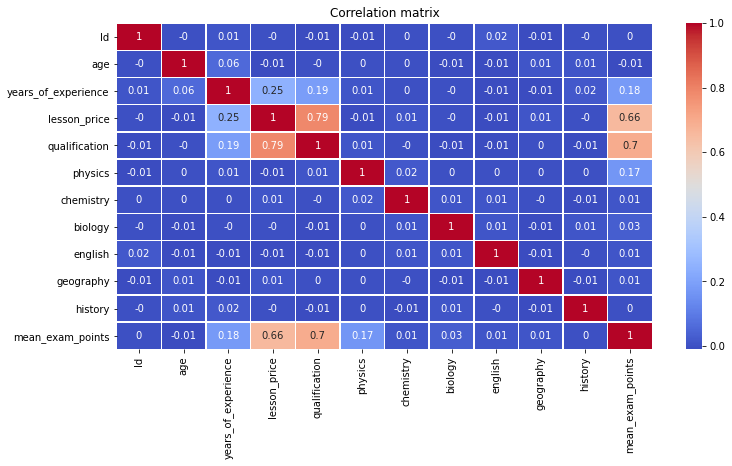

In [5]:
plt.figure(figsize = (12,6))

sns.plotting_context(font_scale=1.4)

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
# corr_matrix[np.abs(corr_matrix) < 0.2] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

In [6]:
df.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,61
1,1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,76
2,2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53
3,3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,54
4,4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,57


In [7]:
fdf.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
0,10000,46.0,3.0,1050.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,10001,43.0,3.0,1850.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10002,52.0,1.0,1550.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,10003,57.0,6.0,2900.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0
4,10004,44.0,4.0,3150.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0


### mean_exam_points

mu = 63.74 and sigma = 14.70


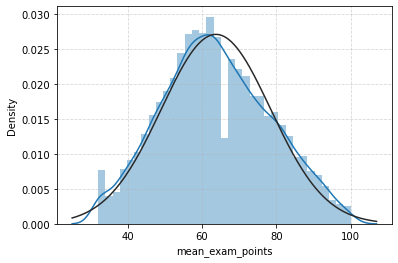

In [8]:
# Строим гистограмму и график плотности распределения
sns.distplot(df['mean_exam_points'], fit=norm)
mu, sigma = norm.fit(df['mean_exam_points'])
print(f'mu = {mu:.2f} and sigma = {sigma:.2f}')
plt.grid(linestyle='--', alpha=0.5)

In [9]:
df.mean_exam_points.value_counts()

63     312
59     279
61     273
57     266
62     264
      ... 
100     32
33      30
96      28
99      19
98      17
Name: mean_exam_points, Length: 69, dtype: int64

### age

In [10]:
df.age.sort_values().unique()

array([23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.,
       36., 37., 38., 39., 40., 41., 42., 43., 44., 45., 46., 47., 48.,
       49., 50., 51., 52., 53., 54., 55., 56., 57., 58., 59., 60., 61.,
       62., 63., 64., 65., 66., 67., 68.])

In [11]:
df['Age'] = pd.cut(df['age'], 5)
df[['Age', 'mean_exam_points']].groupby(['Age'], as_index=False).mean().sort_values(by='Age', ascending=True)

,Age,mean_exam_points
0,"(22.955, 32.0]",63.572340
1,"(32.0, 41.0]",64.149552
2,"(41.0, 50.0]",63.629946
3,"(50.0, 59.0]",63.512053
4,"(59.0, 68.0]",63.873051


In [12]:
df.loc[df['age'] <= 32, 'age'] = 0
df.loc[(df['age'] > 32) & (df['age'] <= 41), 'age'] = 1
df.loc[(df['age'] > 41) & (df['age'] <= 50), 'age'] = 2
df.loc[(df['age'] > 50) & (df['age'] <= 59), 'age'] = 3
df.loc[df['age'] > 59, 'age'] = 4

In [13]:
df = df.drop(['Age'], axis=1)

In [14]:
df.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,0,1.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,61
1,1,2.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,76
2,2,1.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53
3,3,2.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,54
4,4,2.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,57


In [15]:
fdf.loc[fdf['age'] <= 32, 'age'] = 0
fdf.loc[(fdf['age'] > 32) & (fdf['age'] <= 41), 'age'] = 1
fdf.loc[(fdf['age'] > 41) & (fdf['age'] <= 50), 'age'] = 2
fdf.loc[(fdf['age'] > 50) & (fdf['age'] <= 59), 'age'] = 3
fdf.loc[fdf['age'] > 59, 'age'] = 4

In [16]:
fdf.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
0,10000,2.0,3.0,1050.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,10001,2.0,3.0,1850.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10002,3.0,1.0,1550.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,10003,3.0,6.0,2900.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0
4,10004,2.0,4.0,3150.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0


### years_of_experience

In [17]:
df.years_of_experience.sort_values().unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [18]:
df['Years'] = pd.cut(df['years_of_experience'], 5)
df[['Years', 'mean_exam_points']].groupby(['Years'], as_index=False).mean().sort_values(by='Years', ascending=True)

,Years,mean_exam_points
0,"(-0.01, 2.0]",61.754964
1,"(2.0, 4.0]",66.067186
2,"(4.0, 6.0]",70.628176
3,"(6.0, 8.0]",66.955556
4,"(8.0, 10.0]",75.250000


In [19]:
df.loc[df['years_of_experience'] <= 2.0, 'years_of_experience'] = 0
df.loc[(df['years_of_experience'] > 2.0) & (df['years_of_experience'] <= 4.0), 'years_of_experience'] = 1
df.loc[(df['years_of_experience'] > 4.0) & (df['years_of_experience'] <= 6.0), 'years_of_experience'] = 2
df.loc[(df['years_of_experience'] > 6.0) & (df['years_of_experience'] <= 8.0), 'years_of_experience'] = 3
df.loc[df['years_of_experience'] > 8.0, 'years_of_experience'] = 4

In [20]:
df = df.drop(['Years'], axis=1)

In [21]:
df.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,0,1.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,61
1,1,2.0,1.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,76
2,2,1.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53
3,3,2.0,2.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,54
4,4,2.0,0.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,57


In [22]:
fdf.years_of_experience.sort_values().unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [23]:
fdf.loc[fdf['years_of_experience'] <= 2.0, 'years_of_experience'] = 0
fdf.loc[(fdf['years_of_experience'] > 2.0) & (fdf['years_of_experience'] <= 4.0), 'years_of_experience'] = 1
fdf.loc[(fdf['years_of_experience'] > 4.0) & (fdf['years_of_experience'] <= 6.0), 'years_of_experience'] = 2
fdf.loc[(fdf['years_of_experience'] > 6.0) & (fdf['years_of_experience'] <= 8.0), 'years_of_experience'] = 3
fdf.loc[fdf['years_of_experience'] > 8.0, 'years_of_experience'] = 4

In [24]:
fdf.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
0,10000,2.0,1.0,1050.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,10001,2.0,1.0,1850.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10002,3.0,0.0,1550.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,10003,3.0,2.0,2900.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0
4,10004,2.0,1.0,3150.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0


### lesson_price

In [25]:
df.lesson_price.sort_values().unique()

array([ 200.,  250.,  300.,  350.,  400.,  450.,  500.,  550.,  600.,
        650.,  700.,  750.,  800.,  850.,  900.,  950., 1000., 1050.,
       1100., 1150., 1200., 1250., 1300., 1350., 1400., 1450., 1500.,
       1550., 1600., 1650., 1700., 1750., 1800., 1850., 1900., 1950.,
       2000., 2050., 2100., 2150., 2200., 2250., 2300., 2350., 2400.,
       2450., 2500., 2550., 2600., 2650., 2700., 2750., 2800., 2850.,
       2900., 2950., 3000., 3050., 3100., 3150., 3200., 3250., 3300.,
       3350., 3400., 3450., 3500., 3550., 3600., 3650., 3700., 3750.,
       3800., 3950.])

In [26]:
df['Price'] = pd.cut(df['lesson_price'], 5)
df[['Price', 'mean_exam_points']].groupby(['Price'], as_index=False).mean().sort_values(by='Price', ascending=True)

,Price,mean_exam_points
0,"(196.25, 950.0]",56.298319
1,"(950.0, 1700.0]",56.430533
2,"(1700.0, 2450.0]",73.354827
3,"(2450.0, 3200.0]",84.532220
4,"(3200.0, 3950.0]",85.211268


In [27]:
df.loc[df['lesson_price'] <= 950, 'lesson_price'] = 0
df.loc[(df['lesson_price'] > 950) & (df['lesson_price'] <= 1700), 'lesson_price'] = 1
df.loc[(df['lesson_price'] > 1700) & (df['lesson_price'] <= 2450), 'lesson_price'] = 2
df.loc[(df['lesson_price'] > 2450) & (df['lesson_price'] <= 3200), 'lesson_price'] = 3
df.loc[df['lesson_price'] > 3200, 'lesson_price'] = 4

In [28]:
df = df.drop(['Price'], axis=1)

In [29]:
df.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,61
1,1,2.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,76
2,2,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53
3,3,2.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,54
4,4,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,57


In [30]:
fdf.lesson_price.sort_values().unique()

array([ 200.,  250.,  300.,  350.,  400.,  450.,  500.,  550.,  600.,
        650.,  700.,  750.,  800.,  850.,  900.,  950., 1000., 1050.,
       1100., 1150., 1200., 1250., 1300., 1350., 1400., 1450., 1500.,
       1550., 1600., 1650., 1700., 1750., 1800., 1850., 1900., 1950.,
       2000., 2050., 2100., 2150., 2200., 2250., 2300., 2350., 2400.,
       2450., 2500., 2550., 2600., 2650., 2700., 2750., 2800., 2850.,
       2900., 2950., 3000., 3050., 3100., 3150., 3200., 3250., 3300.,
       3350., 3400., 3450., 3500., 3550., 3650., 3750., 3950., 4050.])

In [31]:
fdf.loc[fdf['lesson_price'] <= 950, 'lesson_price'] = 0
fdf.loc[(fdf['lesson_price'] > 950) & (fdf['lesson_price'] <= 1700), 'lesson_price'] = 1
fdf.loc[(fdf['lesson_price'] > 1700) & (fdf['lesson_price'] <= 2450), 'lesson_price'] = 2
fdf.loc[(fdf['lesson_price'] > 2450) & (fdf['lesson_price'] <= 3200), 'lesson_price'] = 3
fdf.loc[fdf['lesson_price'] > 3200, 'lesson_price'] = 4

In [32]:
fdf.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
0,10000,2.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,10001,2.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10002,3.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,10003,3.0,2.0,3.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0
4,10004,2.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0


In [33]:
df.qualification.sort_values().unique(), fdf.qualification.sort_values().unique()

(array([1., 2., 3., 4.]), array([1., 2., 3., 4.]))

In [34]:
df.physics.sort_values().unique(), fdf.physics.sort_values().unique()

(array([0., 1.]), array([0., 1.]))

In [35]:
df.chemistry.sort_values().unique(), fdf.chemistry.sort_values().unique()

(array([0., 1.]), array([0., 1.]))

In [36]:
df.biology.sort_values().unique(), fdf.biology.sort_values().unique()

(array([0., 1.]), array([0., 1.]))

In [37]:
df.english.sort_values().unique(), fdf.english.sort_values().unique()

(array([0., 1.]), array([0., 1.]))

In [38]:
df.geography.sort_values().unique(), fdf.geography.sort_values().unique()

(array([0., 1.]), array([0., 1.]))

In [39]:
df.history.sort_values().unique(), fdf.history.sort_values().unique()

(array([0., 1.]), array([0., 1.]))

### Новые фичи

In [40]:
# медианный балл по параметру qualification
med_P_Q = df.groupby(['qualification'], as_index=False).agg({'mean_exam_points':'median'}).\
                        rename(columns={'mean_exam_points':'med_P_Q'})

df = df.merge(med_P_Q, on=['qualification'], how='left')
fdf = fdf.merge(med_P_Q, on=['qualification'], how='left')
fdf.fillna(df.med_P_Q.median(), inplace=True)

In [41]:
# медианный балл по параметру lesson_price
med_P_P = df.groupby(['lesson_price'], as_index=False).agg({'mean_exam_points':'median'}).\
                        rename(columns={'mean_exam_points':'med_P_P'})

df = df.merge(med_P_P, on=['lesson_price'], how='left')
fdf = fdf.merge(med_P_P, on=['lesson_price'], how='left')
fdf.fillna(df.med_P_P.median(), inplace=True)

In [42]:
# медианный балл по параметру years_of_experience
med_P_Y = df.groupby(['years_of_experience'], as_index=False).agg({'mean_exam_points':'median'}).\
                        rename(columns={'mean_exam_points':'med_P_Y'})

df = df.merge(med_P_Y, on=['years_of_experience'], how='left')
fdf = fdf.merge(med_P_Y, on=['years_of_experience'], how='left')
fdf.fillna(df.med_P_Y.median(), inplace=True)

In [43]:
df.corr()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,med_P_Q,med_P_P,med_P_Y
Id,1.000000,-0.013290,0.007737,-0.000102,-0.005077,-0.010570,0.002694,-0.000016,0.017723,-0.014869,-0.004482,0.004235,-0.004179,-0.003234,0.010490
age,-0.013290,1.000000,0.069035,-0.011407,-0.002493,0.002851,0.003176,-0.004205,-0.012565,0.014056,0.006079,-0.009397,-0.006968,-0.009923,0.073459
years_of_experience,0.007737,0.069035,1.000000,0.272360,0.200844,0.009231,-0.002643,-0.000201,-0.007696,-0.009205,0.016292,0.188867,0.222116,0.291969,0.920415
lesson_price,-0.000102,-0.011407,0.272360,1.000000,0.740173,-0.006323,0.003952,-0.008378,-0.013357,0.009500,-0.000495,0.652670,0.751885,0.962462,0.268883
qualification,-0.005077,-0.002493,0.200844,0.740173,1.000000,0.007529,-0.002683,-0.007504,-0.008047,0.003610,-0.005109,0.698261,0.978451,0.763913,0.198610
physics,-0.010570,0.002851,0.009231,-0.006323,0.007529,1.000000,0.019852,0.000661,0.004238,0.001904,0.004867,0.169535,0.007642,-0.001997,0.003741
chemistry,0.002694,0.003176,-0.002643,0.003952,-0.002683,0.019852,1.000000,0.007866,0.009974,-0.004447,-0.008079,0.010640,-0.001888,-0.003894,-0.005476
biology,-0.000016,-0.004205,-0.000201,-0.008378,-0.007504,0.000661,0.007866,1.000000,0.010146,-0.013042,0.010995,0.026535,-0.007991,-0.006103,0.002166
english,0.017723,-0.012565,-0.007696,-0.013357,-0.008047,0.004238,0.009974,0.010146,1.000000,-0.008148,-0.004560,0.007755,-0.007686,-0.009204,-0.008766
geography,-0.014869,0.014056,-0.009205,0.009500,0.003610,0.001904,-0.004447,-0.013042,-0.008148,1.000000,-0.005049,0.013323,-0.001715,0.008343,-0.014874


## IV. Масштабирование данных <a class='anchor' id='4'>

In [44]:
def standard_scale(x):
    mean = x.mean(axis=0)
    std = x.std(axis=0)
    return (x - mean) / std

In [65]:
X = np.array(df.drop(['Id', 'mean_exam_points', 'chemistry', 'biology', 'english', 'geography', 'history'], axis=1))
X = np.hstack((np.ones((X.shape[0],1)), X))
y = np.array(df['mean_exam_points'])
ind = np.array(df['Id'])

X_f = np.array(fdf.drop(['Id', 'chemistry', 'biology', 'english', 'geography', 'history'], axis=1))
X_f = np.hstack((np.ones((X_f.shape[0],1)), X_f))
ind_f = np.array(fdf[['Id']])

In [66]:
X

array([[ 1.,  0.,  1., ..., 56., 57., 62.],
       [ 1.,  1.,  3., ..., 83., 85., 65.],
       [ 1.,  0.,  1., ..., 56., 57., 62.],
       ...,
       [ 1.,  0.,  1., ..., 56., 57., 62.],
       [ 1.,  1.,  1., ..., 56., 57., 65.],
       [ 1.,  0.,  1., ..., 56., 57., 62.]])

In [67]:
y

array([61, 76, 53, ..., 62, 56, 52])

In [68]:
X_st = X.copy()
X_st[:,6:] = standard_scale(X_st[:,6:])
X_st

array([[ 1.        ,  0.        ,  1.        , ..., -0.80648096,
        -0.73596161, -0.61096499],
       [ 1.        ,  1.        ,  3.        , ...,  1.82920534,
         2.08030783,  0.52677243],
       [ 1.        ,  0.        ,  1.        , ..., -0.80648096,
        -0.73596161, -0.61096499],
       ...,
       [ 1.        ,  0.        ,  1.        , ..., -0.80648096,
        -0.73596161, -0.61096499],
       [ 1.        ,  1.        ,  1.        , ..., -0.80648096,
        -0.73596161,  0.52677243],
       [ 1.        ,  0.        ,  1.        , ..., -0.80648096,
        -0.73596161, -0.61096499]])

In [69]:
X_stf = X_f.copy()
X_stf[:, 5:] = standard_scale(X_stf[:, 5:])
X_stf

array([[ 1.        ,  1.        ,  1.        , ..., -0.79580446,
        -0.73334912,  0.52740924],
       [ 1.        ,  1.        ,  2.        , ...,  0.08081453,
         0.98449843,  0.52740924],
       [ 1.        ,  0.        ,  1.        , ..., -0.79580446,
        -0.73334912, -0.61388099],
       ...,
       [ 1.        ,  2.        ,  1.        , ..., -0.79580446,
        -0.73334912,  2.8099897 ],
       [ 1.        ,  0.        ,  2.        , ...,  0.08081453,
         0.98449843, -0.61388099],
       [ 1.        ,  2.        ,  2.        , ...,  0.08081453,
         0.98449843,  2.8099897 ]])

## V. Модель предсказания целевой переменной <a class='anchor' id='5'>

In [70]:
# разбиваем датафреймы на тренировочные и валидационные
X_train, X_valid, y_train, y_valid = train_test_split(X_st, y, 
                                                      test_size=0.33, 
                                                      shuffle=True, 
                                                      random_state=3, 
                                                      stratify=y)

In [71]:
X_train.shape, X_valid.shape

((6700, 8), (3300, 8))

In [72]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [73]:
# классический  GD
def gradient_descent(X, y, iterations, eta=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(iterations+1):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        W -= eta * (2/n * X.T @ (y_pred - y))
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
            
    return W

In [74]:
W = gradient_descent(X_train, y_train, iterations=100000, eta=0.01)

Iter: 0, weights: [ 2.81281896  1.47850084  1.05236528  2.84812889  0.88389757  0.19546879
 -0.18066936 -0.3483723 ], error 4057.7626709992846
Iter: 10000, weights: [4.30314842e+01 1.01165117e-01 3.96170949e+00 7.50617930e+00
 5.19788692e+00 8.60013997e-01 2.06056928e+00 1.66418704e-02], error 94.34207038895893
Iter: 20000, weights: [56.03371736 -0.4916826   1.04669252  2.61502588  5.09470072  4.66385564
  4.1231944   0.32170104], error 92.0140467019532
Iter: 30000, weights: [61.78067597 -0.75205241 -0.22866535  0.44163183  5.04926329  6.35467935
  5.02528833  0.45533026], error 91.55892960683731
Iter: 40000, weights: [64.32169608 -0.86715864 -0.79243223 -0.51945235  5.02917485  7.1023747
  5.42405196  0.51440258], error 91.46995414297666
Iter: 50000, weights: [65.44521808 -0.91805314 -1.0417026  -0.94440068  5.02029269  7.43297212
  5.60036587  0.54052152], error 91.45255942552102
Iter: 60000, weights: [65.94198783 -0.94055634 -1.15191848 -1.13229329  5.01636541  7.5791471
  5.6783237

In [75]:
def calc_pred(W, X):

    y_pred = np.round(np.dot(X, W))

    return y_pred

In [76]:
y_train[1:20]

array([83, 44, 59, 77, 76, 60, 38, 69, 55, 66, 72, 61, 72, 82, 57, 56, 69,
       78, 56])

In [77]:
y_train_pred = calc_pred(W, X_train)
y_train_pred[1:20]

array([84., 53., 58., 72., 72., 53., 53., 53., 53., 61., 58., 58., 72.,
       72., 64., 67., 53., 84., 53.])

In [78]:
y_valid[1:20]

array([35, 35, 82, 49, 67, 45, 64, 41, 78, 70, 69, 43, 97, 72, 60, 52, 87,
       65, 45])

In [79]:
y_valid_pred = calc_pred(W, X_valid)
y_valid_pred[1:20]

array([53., 53., 84., 53., 53., 58., 54., 53., 64., 63., 67., 53., 89.,
       59., 58., 53., 89., 79., 53.])

## VI. Оценка качества классификации <a class='anchor' id='6'>

In [80]:
def r2(y, y_pred):
    return np.abs(1-(calc_mse(y, y_pred)/np.var(y)))

In [81]:
r2_t = r2(y_train, y_train_pred)
r2_t

0.5757661653221394

In [82]:
r2_v = r2(y_valid, y_valid_pred)
r2_v

0.5772583509781878

## VII. Предсказание и сохранение финальных данных <a class='anchor' id='7'>

In [63]:
y_pred = calc_pred(W, X_stf)
final_df = pd.DataFrame({'Id':ind_f[:,0], 'mean_exam_points':y_pred})
final_df.to_csv('predict.csv', index=False, encoding='utf-8')

In [64]:
final_df

,Id,mean_exam_points
0,10000,53.0
1,10001,67.0
2,10002,58.0
3,10003,89.0
4,10004,89.0
...,...,...
9995,19995,53.0
9996,19996,79.0
9997,19997,53.0
9998,19998,67.0
